# Decision Trees (CAP5602 Lecture 4)

In this example, we will train a decision tree classifier on the Iris dataset.

### 1. Load data

First, we load the dataset from `sklearn` and print its feature names as well as the target names (labels).

In [10]:
from sklearn.datasets import load_iris

iris = load_iris()

print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


This dataset has 4 features and 3 labels.

Now we get the input matrix X and the label vector Y from the dataset:
*   Each row of the matrix X is an example and each column corresponds to a feature.
*   The label vector Y contains the labels of all examples.

Let's print the sizes of the input matrix X and the label vector Y. Also, print the first 10 examples and labels.

In [11]:
X, Y = iris.data, iris.target

print(X.shape)
print(Y.shape)

# Print the first 10 examples
print(X[:10])
print(Y[:10])

(150, 4)
(150,)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]


We see that there are 150 examples in the dataset and each example has 4 features.

### 2. Split data into train and test sets

Next, we will randomly split the dataset into a train set and test set. We will use the function `train_test_split` in `sklearn` for the split. In the code below, the test set will contain 33% of the original data. We set the `random_state` parameter to get the same split every time.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Print size of train and test sets to check
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

# Print the labels in train and test sets to check that they are all random
print(Y_train)
print(Y_test)

(100, 4) (100,)
(50, 4) (50,)
[1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 1 0 2
 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1
 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]


### 3. Train a decision tree classifier on the train set

Next, we train the decision tree classifier on the train set.

In [13]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model = model.fit(X_train, Y_train)

### 4. Visualize the trained tree

The model has been trained, but we don't see anything. Let's plot it with `graphviz`.

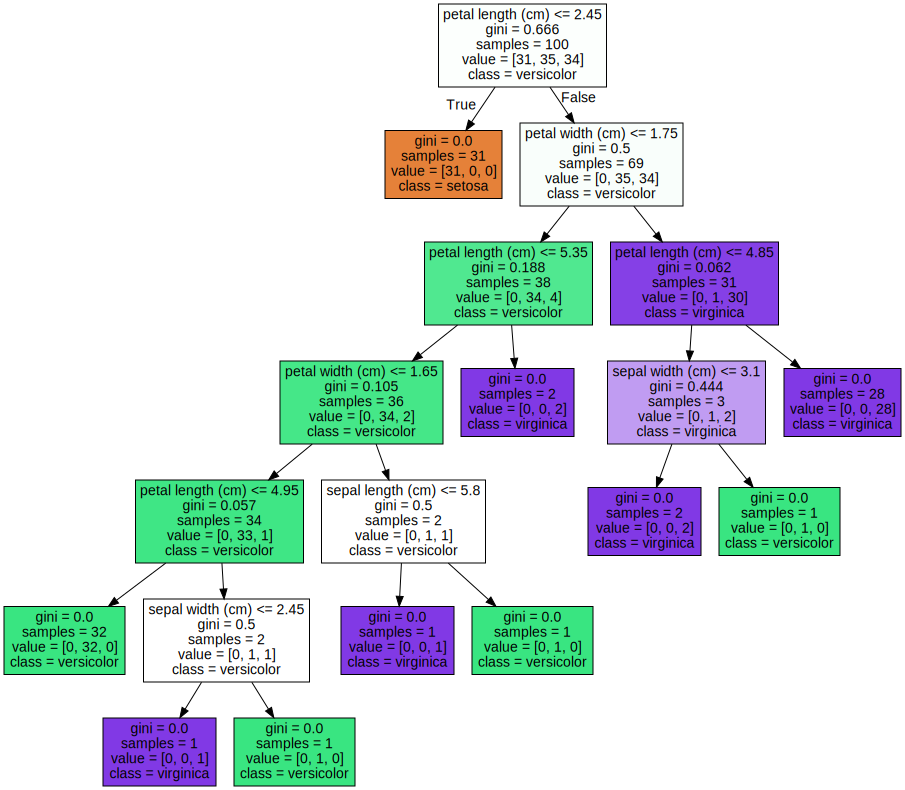

In [16]:
import graphviz

dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names, 
                                filled=True)
graph = graphviz.Source(dot_data)
graph

### 5. Evaluate the tree on the test set

We have trained our decision tree on the train set. Now we can use the tree to make prediction on the test set.

In [17]:
Y_pred = model.predict(X_test)

print(Y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]


We can compute the accuracy between the predicted labels `Y_pred` and the true labels `Y_test`. To do this, we can use the function `accuracy_score` from `sklearn`.

In [18]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test, Y_pred)
print('Accuracy on test set:', acc)

Accuracy on test set: 0.98


# Exercise:

Try the regression example here: https://scikit-learn.org/stable/modules/tree.html#regression

